In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

sns.set(style="whitegrid")


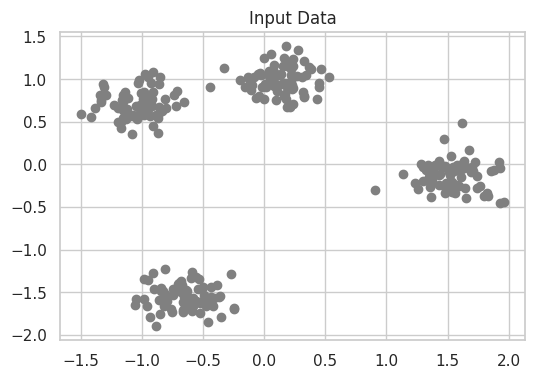

In [2]:
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)


X = X_blobs
y_true = y_blobs

X = StandardScaler().fit_transform(X)


plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c='gray')
plt.title("Input Data")
plt.show()


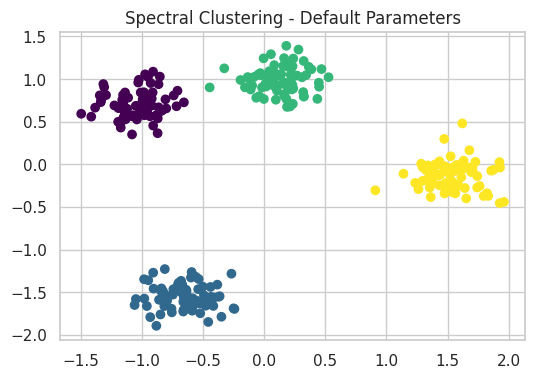

Silhouette Score: 0.797473988963273


In [3]:
#Using default parameters
sc = SpectralClustering(n_clusters=4, affinity='rbf', assign_labels='kmeans', random_state=42)
labels = sc.fit_predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.title("Spectral Clustering - Default Parameters")
plt.show()

# Evaluate with silhouette score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


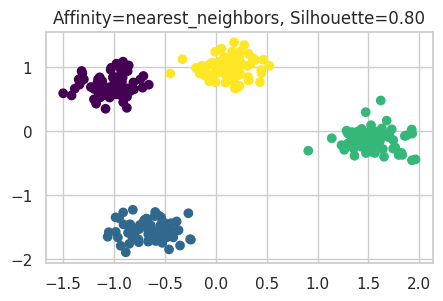

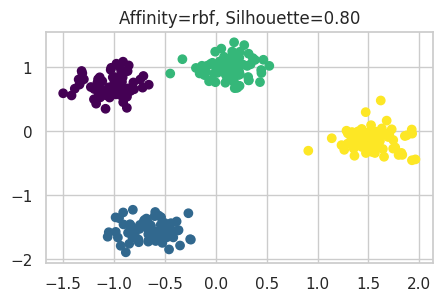

In [4]:
#Exploring different affinity options
for affinity in ['nearest_neighbors', 'rbf']:
    sc = SpectralClustering(n_clusters=4, affinity=affinity, assign_labels='kmeans', random_state=42)
    labels = sc.fit_predict(X)
    score = silhouette_score(X, labels)
    plt.figure(figsize=(5,3))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
    plt.title(f"Affinity={affinity}, Silhouette={score:.2f}")
    plt.show()

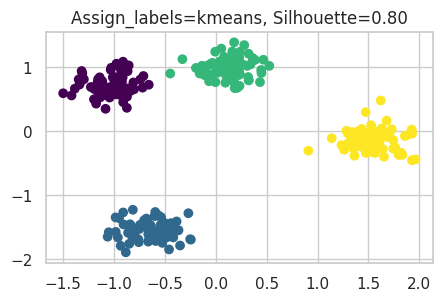

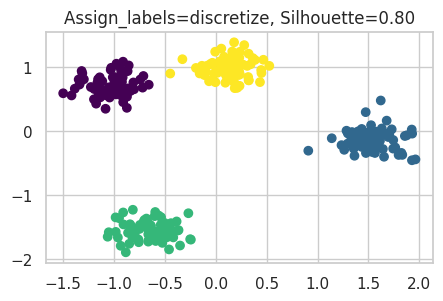

In [5]:
#Exploring different assign_labels options
for assign_labels in ['kmeans', 'discretize']:
    sc = SpectralClustering(n_clusters=4, affinity='rbf', assign_labels=assign_labels, random_state=42)
    labels = sc.fit_predict(X)
    score = silhouette_score(X, labels)
    plt.figure(figsize=(5,3))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
    plt.title(f"Assign_labels={assign_labels}, Silhouette={score:.2f}")
    plt.show()

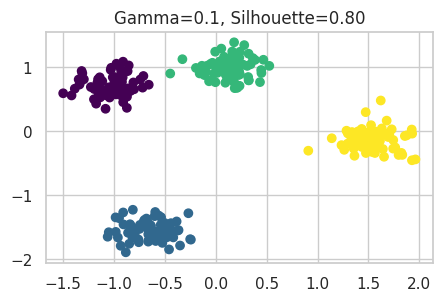

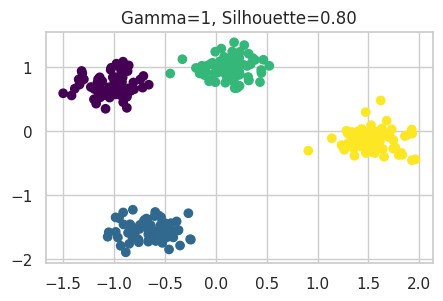

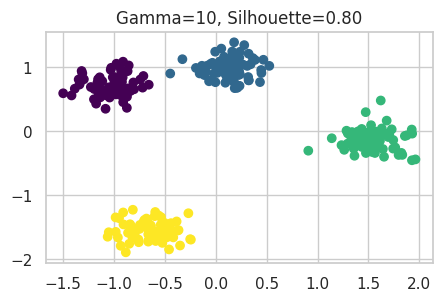

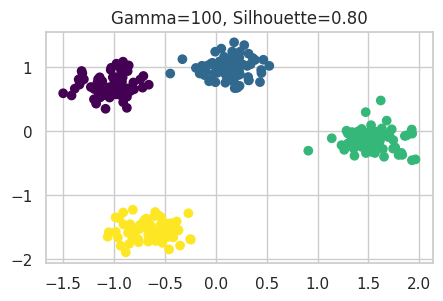

In [6]:
# Exploring gamma parameter in rbf affinity
for gamma in [0.1, 1, 10, 100]:
    sc = SpectralClustering(n_clusters=4, affinity='rbf', gamma=gamma, assign_labels='kmeans', random_state=42)
    labels = sc.fit_predict(X)
    score = silhouette_score(X, labels)
    plt.figure(figsize=(5,3))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
    plt.title(f"Gamma={gamma}, Silhouette={score:.2f}")
    plt.show()